In [2]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#import statement
from transformers import AutoTokenizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#build a tokenizer funct.

def sentence_tokenizer(input_text):
  tokenizer = AutoTokenizer.from_pretrained("kredor/punctuate-all")
  tokenized_sentences = [] 
  sentences = tokenizer.tokenize(input_text)
  for sentence in sentences:
    if tokenizer.tokenize(sentence) == [sentence]:
      tokenized_sentences.append(sentence)
  return tokenized_sentences

In [5]:
#add real time input
tokenizer = AutoTokenizer.from_pretrained("kredor/punctuate-all")
while True:
  text = input("Enter text('q' to exit): ")
  if text == 'q':
    break
  tokenized = sentence_tokenizer(text)
  print("Sentences:")
  for sentence in tokenized:
    print(sentence)
  result = tokenizer.tokenize(text)
  print("Tokenized Text:")
  print(result)

Enter text('q' to exit): q


In [6]:
# Load the dataset
data = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [8]:
data['length'] = data['message'].apply(len)
data.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

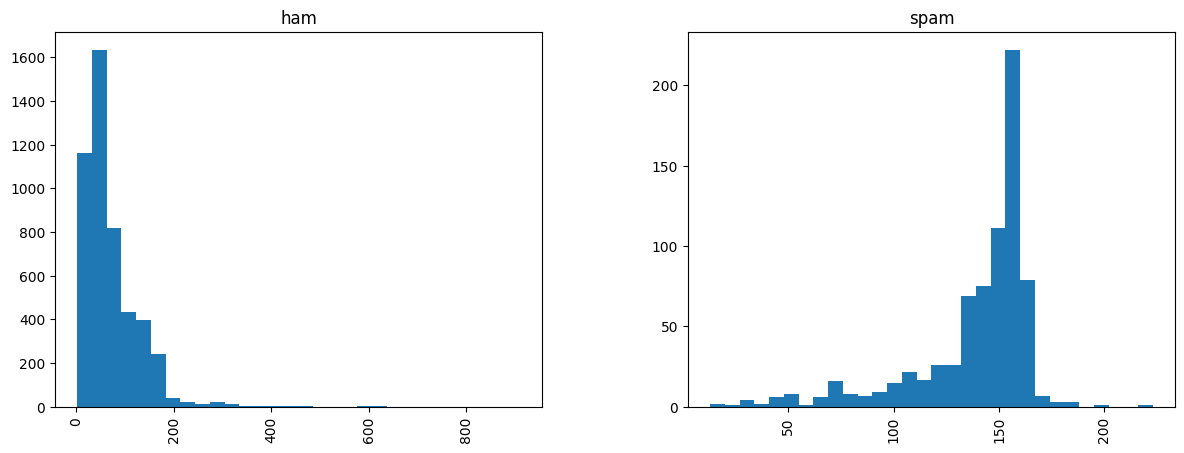

In [9]:
data.hist(column='length', by='label', bins=30,figsize=(14,5))

In [10]:
#checking mistakes and tests

# Split the dataset into training and testing sets
X = data['message']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a CountVectorizer to convert text into numeric features
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_vectorized)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9904306220095693
